In [47]:
import numpy as np
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as ani 

In [55]:
def line_hadamard(N):
    a = np.zeros((1, N))[0]
    b = np.ones((1, N-1))[0]
    H = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)

    A = nx.from_numpy_matrix(np.array(H))  
    nx.draw(A, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    return H 

In [91]:
def unitary_evolution(H, P, t):
    x = np.dot(1j,H)
    U = expm(np.dot(t,x))
    psi = np.matmul(P,U)
    return psi

In [61]:
def CTQW_line(N, t):
    """Function that takes in a Hadamard matrix dimension and returns the unitary evolution operator, and plots the evolution visually"""
    H = line_hadamard(N)
    #defining the position array and central vertex
    P = np.zeros(len(H))
    P[math.ceil(len(P)/2)-1] = 1
    G = np.zeros(len(H))
    for i in range(len(H)):
        G[i] = i
    #performing unitary evolution
    psi = unitary_evolution(H, P, t)

    #square values and check that probabilities sum to 1 
    prob = 0
    for i in range(len(psi)):
        psi[i] = abs(psi[i])**2
        prob += psi[i]
    
    #plot results
    plt.bar(G, psi)
    plt.title(f'Continuous Time Quantum Walk on a line after {t} seconds')
    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.show()

    return G, psi, prob

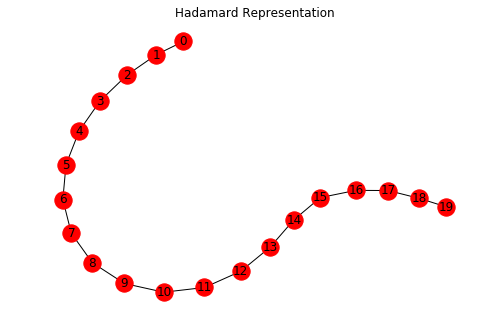

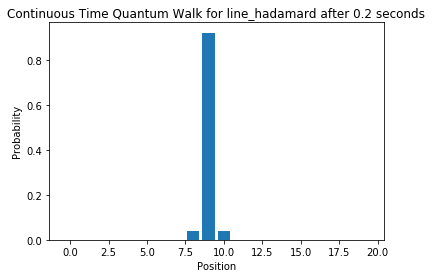

In [62]:
x, y, prob = CTQW_line(20, 0.2)

In [99]:
def CTQW_line_contour(N, t):
    """Function that takes in a Hadamard matrix dimension and returns the unitary evolution operator, and plots the evolution visually"""
    H = line_hadamard(N)
    T = np.linspace(0,t,20)
    #defining the position array and central vertex
    P = np.zeros(len(H))
    P[math.ceil(len(P)/2)-1] = 1
    G = np.zeros(len(H))
    for i in range(len(H)):
        G[i] = i
    Z = np.zeros((len(G), len(T)))
    #performing unitary evolution for each timestep
    for i in range(len(T)):
        ti = T[i]
        psi = unitary_evolution(H, P, ti)
        for k in range(len(psi)):
            psi[k] = abs(psi[k])**2
        for j in range(len(G)):
            Z[i][j] = psi[j]
    return T, G, Z

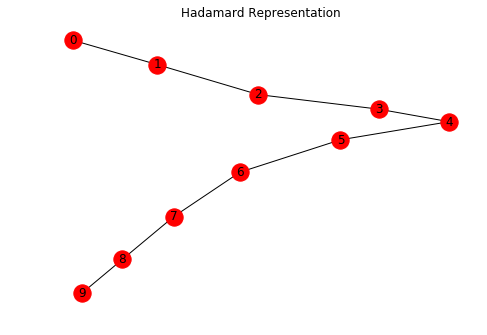

IndexError: index 10 is out of bounds for axis 0 with size 10

In [100]:
CTQW_line_contour(10,5)